<center> <h1 style="background-color:orange; color:white"><br>Exploratory Data Analysis<br></h1></center>

# `Problem Statement:`
For this project I have used Cars dataset from kaggle  with features including make, model, year, engine, and other properties of the car.

## Step 0 : Importing the necessary libraries and dataset





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns             #visualisation
import matplotlib.pyplot as plt   #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from numpy import mean

In [2]:
## load the csv file 
df = pd.read_csv('Cars_data.csv')

# Step 1: Data Understanding

    a) Dataframe Shape
    b) head and tail
    c) dtypes
    d) descibe

In [3]:
## print total rows and columns in the dataset
df.shape

(11914, 16)

In [4]:
## print the head of the dataframe
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
#check column names of the dataset
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
df['Make'].value_counts()

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyker    

In [7]:
df['Make'].nunique()

48

In [8]:
df['Transmission Type'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [9]:
## Get the datatypes of each columns 
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [10]:
## get description of the data in the DataFrame
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## Step 2: Data Preparation

    a) Dropping irrelevant columns and rows
    b) Removing NULL/missing value
    c) Renaming columns
    

We will drop the columns that are irrelevant to us. Below are the columns that need to be dropped

"Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"

These features are not neccessary to obtain the model's accucary. It does not contain any relevant information in the dataset. 

In [11]:
# drop the irrevalent cols and print the head of the dataframe

df=df.drop(['Engine Fuel Type', "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"], axis=1)

# print df head

df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [12]:
#  renaming the current columns - 

df=df.rename(columns={'Make':'COMPANY NAME','Model':'CAR MODEL','Year':'YEAR','Engine HP':'ENGINE HP','Engine Cylinders':'ENGINE CYLINDERS','Transmission Type':'TRANSMISSION TYPE','Driven_Wheels':'DRIVEN_WHEELS','hghway MPG':'HIGHWAY MPG','city mpg':'CITY MPG','MSRP':'PRICE'})
df.head()

,COMPANY NAME,CAR MODEL,YEAR,ENGINE HP,ENGINE CYLINDERS,TRANSMISSION TYPE,DRIVEN_WHEELS,highway MPG,CITY MPG,PRICE
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [13]:
# check Null values

df.isna().sum()

COMPANY NAME          0
CAR MODEL             0
YEAR                  0
ENGINE HP            69
ENGINE CYLINDERS     30
TRANSMISSION TYPE     0
DRIVEN_WHEELS         0
highway MPG           0
CITY MPG              0
PRICE                 0
dtype: int64

We can observe that columns ENGINE HP and ENGINE CYLINDERS have 69 and 30 null values respectively.

In [14]:
# check number of rows before removing duplicated rows
df[df.duplicated()]

,COMPANY NAME,CAR MODEL,YEAR,ENGINE HP,ENGINE CYLINDERS,TRANSMISSION TYPE,DRIVEN_WHEELS,highway MPG,CITY MPG,PRICE
14,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,28,19,31500
18,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
20,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
24,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000
25,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000
...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,95.0,4.0,MANUAL,four wheel drive,26,22,2000
11603,Volvo,XC60,2017,302.0,4.0,AUTOMATIC,all wheel drive,29,20,46350
11604,Volvo,XC60,2017,240.0,4.0,AUTOMATIC,front wheel drive,30,23,40950
11708,Suzuki,XL7,2008,252.0,6.0,AUTOMATIC,all wheel drive,22,15,29149


In [15]:
# drop the duplicated rows

df=df.drop_duplicates()

# print head of df

df.head()

,COMPANY NAME,CAR MODEL,YEAR,ENGINE HP,ENGINE CYLINDERS,TRANSMISSION TYPE,DRIVEN_WHEELS,highway MPG,CITY MPG,PRICE
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [16]:
# Count Number of rows after deleting duplicated rows

df.count()

COMPANY NAME         10925
CAR MODEL            10925
YEAR                 10925
ENGINE HP            10856
ENGINE CYLINDERS     10895
TRANSMISSION TYPE    10925
DRIVEN_WHEELS        10925
highway MPG          10925
CITY MPG             10925
PRICE                10925
dtype: int64

## Handling Outliers

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

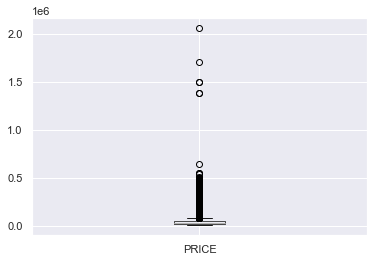

In [17]:
## Plot a boxplot for 'Price' column in dataset. 

boxplot = df.boxplot(['PRICE']) 

### **`Observation:`**<br>

Here as we see that we got some values near to 1.5 and 2.0 . So these values are called outliers. Because there are away from the normal values.
Now we have detect the outliers of the feature of Price. Similarly we will checking of anothers features.

<AxesSubplot: >

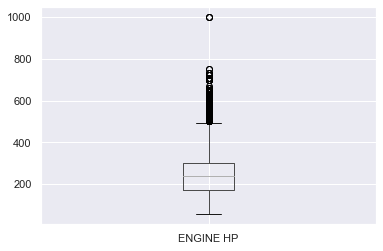

In [18]:
## PLot a boxplot for 'HP' columns in dataset
df.boxplot(['ENGINE HP']) 

### **`Observation:`**<br>
Here boxplots show the proper distribution of of 25 percentile and 75 percentile of the feature of HP.

In [19]:
df.dtypes

COMPANY NAME          object
CAR MODEL             object
YEAR                   int64
ENGINE HP            float64
ENGINE CYLINDERS     float64
TRANSMISSION TYPE     object
DRIVEN_WHEELS         object
highway MPG            int64
CITY MPG               int64
PRICE                  int64
dtype: object

In [20]:
# print all the columns which are of int or float datatype in df.

result = df.select_dtypes(include=[float,int])
result

,YEAR,ENGINE HP,ENGINE CYLINDERS,highway MPG,CITY MPG,PRICE
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500
...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,46120
11910,2012,300.0,6.0,23,16,56670
11911,2012,300.0,6.0,23,16,50620
11912,2013,300.0,6.0,23,16,50920


## **`Outliers removal techniques - IQR Method`**
 

IQR stands for Inter Quartile Range. It is one the most popular ways to remove outliers.

IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

- Calculate IQR  and give a suitable threshold to remove the outliers and save this new dataframe into df2.

Let us help you to decide threshold: Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or above (Q3 + 1.5x IQR)

In [21]:
## define Q1 and Q2
Q1 =np.percentile(result['CITY MPG'],25) 
Q3 = np.percentile(result['CITY MPG'],75)

# # define IQR (interquantile range) 
IQR = Q3-Q1   

# # define df2 after removing outliers
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df[df['CITY MPG'] > upper]
df[df['CITY MPG'] < lower]

df2 = df[df['CITY MPG'] < upper]


In [22]:
# find the shape of df & df2
df.shape

(10925, 10)

In [23]:
df2.shape

(10505, 10)

In [24]:
df

,COMPANY NAME,CAR MODEL,YEAR,ENGINE HP,ENGINE CYLINDERS,TRANSMISSION TYPE,DRIVEN_WHEELS,highway MPG,CITY MPG,PRICE
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


## `Visualising Univariate Distributions`

### `Histogram & Density Plots`

Histograms and density plots show the frequency of a numeric variable along the y-axis, and the value along the x-axis. The ```sns.distplot()``` function plots a density curve.

<AxesSubplot: xlabel='ENGINE HP', ylabel='Density'>

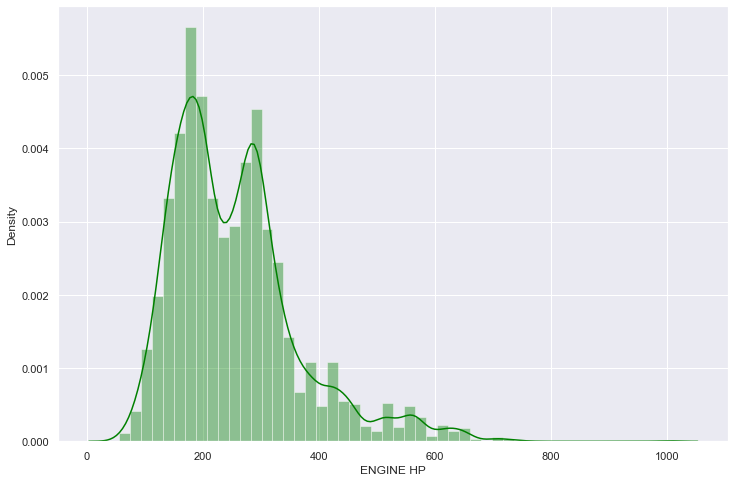

In [25]:
#ploting distplot for variable HP
plt.figure(figsize = (12,8))
sns.distplot(a=df['ENGINE HP'], color='green')


## `Bar Chart Plots`


Plot a histogram depicting the make in X axis and number of cars in y axis. <br>

Text(0, 0.5, 'No. of cars')

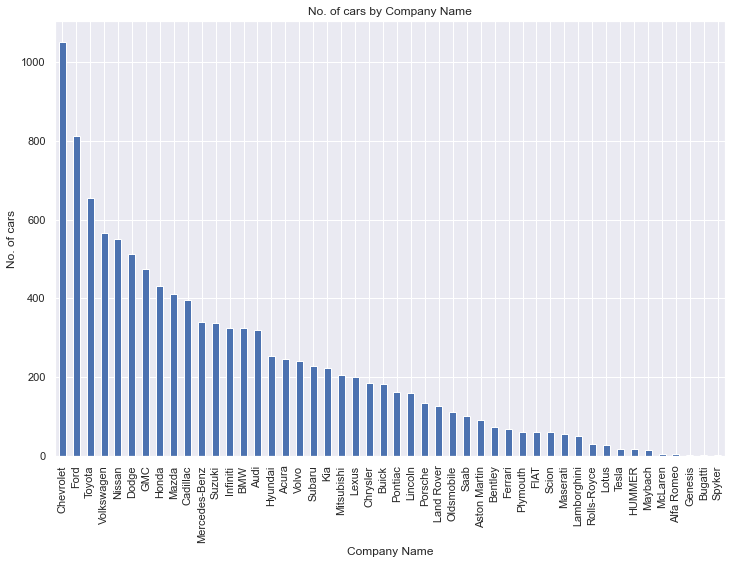

In [26]:
plt.figure(figsize = (12,8))

# Plot Title, X & Y label

ax=df['COMPANY NAME'].value_counts().plot.bar(title='No. of cars by Company Name')
ax.set_xlabel('Company Name')
ax.set_ylabel('No. of cars')

### **`Observation:`**
In this plot we can see that we have plot the bar plot with the cars model and nos. of cars.

### `Count Plot`
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.


 Plot a countplot for a variable Transmission vertically with hue as Drive mode

<AxesSubplot: xlabel='TRANSMISSION TYPE', ylabel='count'>

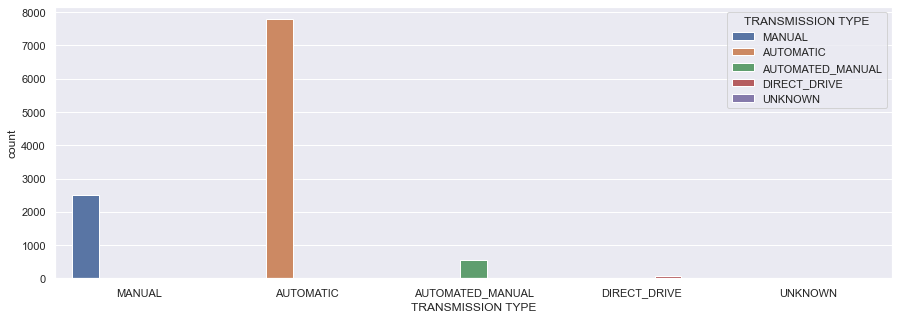

In [28]:
plt.figure(figsize=(15,5))

# plot countplot on transmission and drive mode

sns.countplot(x=df["TRANSMISSION TYPE"],data=df,hue = "")


### **`Observation:`**
In this count plot, We have plot the feature of Transmission with help of hue.<br>
We can see that the the nos of count and the transmission type and automated manual is plotted. Drive mode as been given with help of hue.<br>


# `Visualising Bivariate Distributions`


Bivariate distributions are simply two univariate distributions plotted on x and y axes respectively. They help you observe the relationship between the two variables.




## `Scatter Plots`
Scatterplots are used to find the correlation between two continuos variables.

Using scatterplot find the correlation between 'HP' and 'Price' column of the data. 



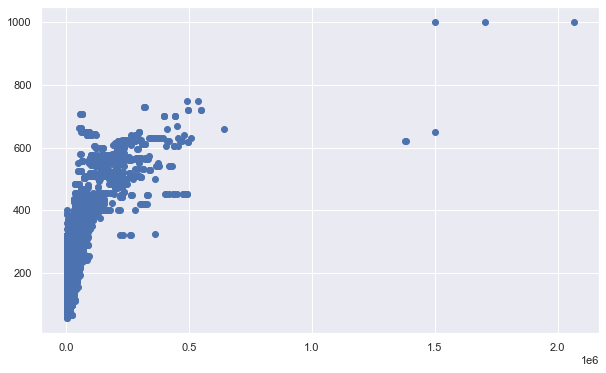

In [29]:
## Your code here - 
fig, ax = plt.subplots(figsize=(10,6))

# plot scatterplot on hp and price

plt.scatter(df['PRICE'],df['ENGINE HP'])
plt.show()

### **`Observation:`**<br>
It is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.<br>
We have plot the scatter plot with x axis as HP and y axis as Price.<br>
The data points between the features should be same either wise it give errors.<br>


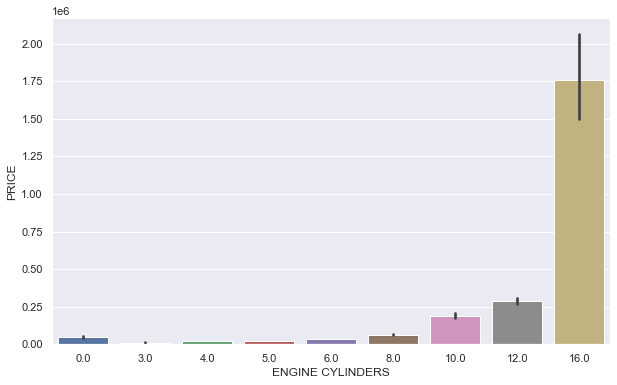

In [31]:
# bar plot with default statistic=mean between Cylinder and Price

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x = df["ENGINE CYLINDERS"], y = df["PRICE"])

# display
plt.show()



### **`Observation:`**<br>
By default, seaborn plots the mean value across categories, though you can plot the count, median, sum etc.<br>
Also, barplot computes and shows the confidence interval of the mean as well.



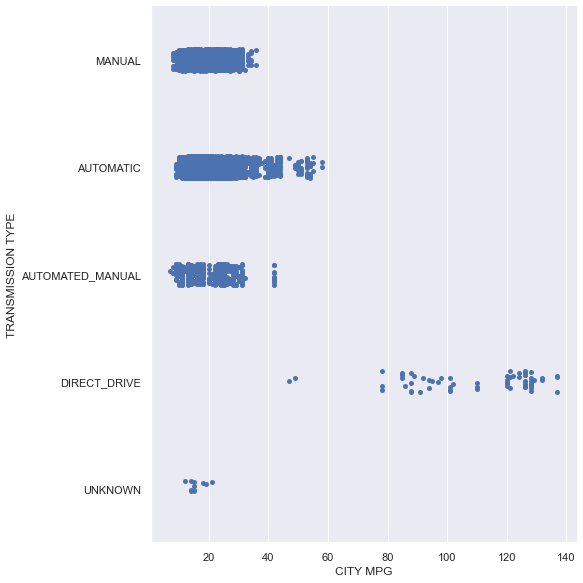

In [33]:
# Plotting categorical variable Transmission across the y-axis
sns.catplot(data=df, x="CITY MPG", y="TRANSMISSION TYPE", height=8.27)

# `Multivariate Plots`



## `Heatmaps`


A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information

Using heatmaps plot the correlation between the features present in the dataset.

In [34]:
#find the correlation of features of the data 
corr = df.corr()

# print corr
corr

,YEAR,ENGINE HP,ENGINE CYLINDERS,highway MPG,CITY MPG,PRICE
YEAR,1.000000,0.313833,-0.057691,0.259907,0.198013,0.197071
ENGINE HP,0.313833,1.000000,0.788007,-0.412052,-0.445661,0.659568
ENGINE CYLINDERS,-0.057691,0.788007,1.000000,-0.615148,-0.597641,0.540688
highway MPG,0.259907,-0.412052,-0.615148,1.000000,0.885991,-0.167339
CITY MPG,0.198013,-0.445661,-0.597641,0.885991,1.000000,-0.163052
PRICE,0.197071,0.659568,0.540688,-0.167339,-0.163052,1.000000


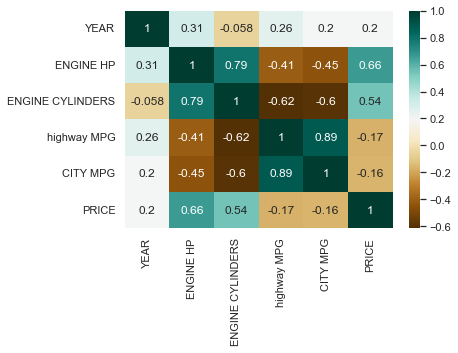

In [35]:
# Using the correlated df, plot the heatmap 
# set cmap = 'BrBG', annot = True - to get the same graph as shown below 
# set size of graph = (12,8)

hm = sns.heatmap(data=corr,cmap='BrBG' ,annot=True
               )
plt.show()


### **`Observation:`**<br>
A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.


The above heatmap plot shows correlation between various variables in the colored scale of -1 to 1. 
